1. Import modules

In [12]:
!pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24576 sha256=fa68e762537f2f3e846a6b378672f2a3eb74a587f2f0fd77bbc0eaa2eb3cafb5
  Stored in directory: c:\users\emzek\appdata\local\pip\cache\wheels\77\54\7c\c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built pydotplus


In [14]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import matplotlib.pyplot as plt
import matplotlib.image as pltimg


In [15]:
df = pd.read_csv("HR-Attrition.csv")
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [18]:
df.Attrition.unique()

array([1, 0], dtype=int64)

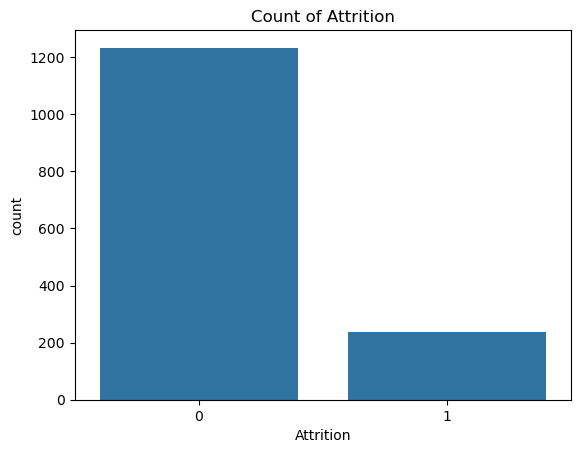

In [20]:
import seaborn as sns
sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')
plt.show()

In [44]:
print(df.groupby('Attrition').size())

Attrition
0    1233
1     237
dtype: int64


2. Split the dataset into testing and training sets

In [66]:
X = df.drop(columns=['Attrition']) 
y = df.Attrition #target 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2,  random_state = 0)

3. Split the features and target variables

In [28]:
features = [
    "Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeCount", "EmployeeNumber", 
    "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", 
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "PerformanceRating", 
    "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TotalWorkingYears", 
    "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", 
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

X = df[features] #input
y = df['Attrition'] #target



4. Model evaluation using Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.812


The accuracy of training set is 100% and testing set is 75.10%. This indicates overfitting, therefore we need to apply pre-prunning to the tree. We will add a max_depth= 3 (limiting the depth/ branching of tree).

In [68]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.882
Accuracy on test set: 0.837


5. Feature Importance in Decision Trees

In [70]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.05354287 0.03598664 0.01965588 0.02179308 0.         0.05700239
 0.04234992 0.08072256 0.08103608 0.07160368 0.05868819 0.0479658
 0.         0.         0.03394065 0.         0.         0.
 0.05840832 0.24261306 0.         0.05342293 0.         0.
 0.         0.04126796]


6. Visualization of feature importance

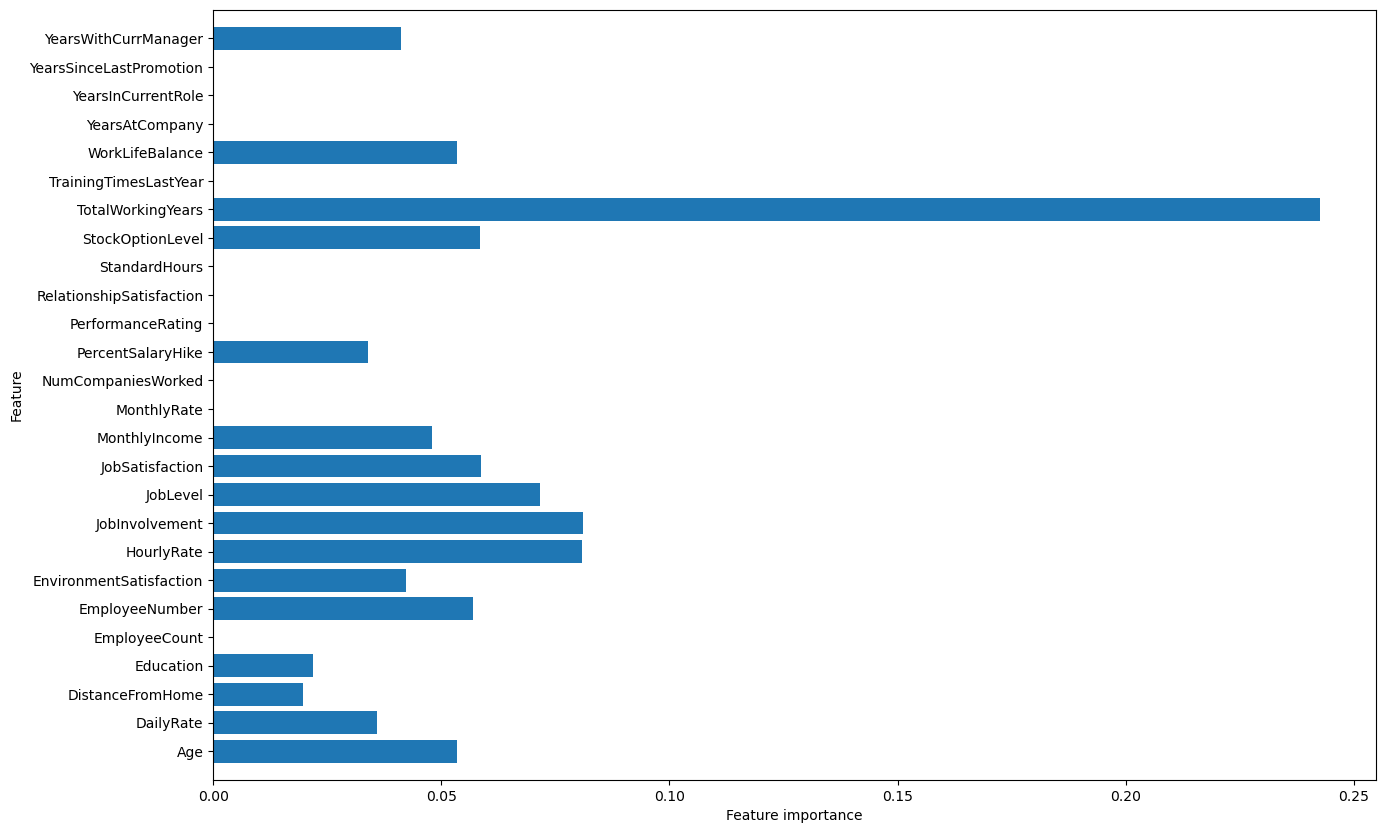

In [72]:
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = 26  #total number of input features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_attrition(tree)

In [74]:
important_features = ["Age", "DailyRate", "DistanceFromHome", "Education", "EmployeeNumber", 
    "EnvironmentSatisfaction", "HourlyRate", "JobInvolvement", "JobLevel", "JobSatisfaction", 
    "MonthlyIncome", "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears", "WorkLifeBalance", "YearsWithCurrManager"]

f = df[important_features] #input
t = df['Attrition'] #target



7. Create decision tree using important features

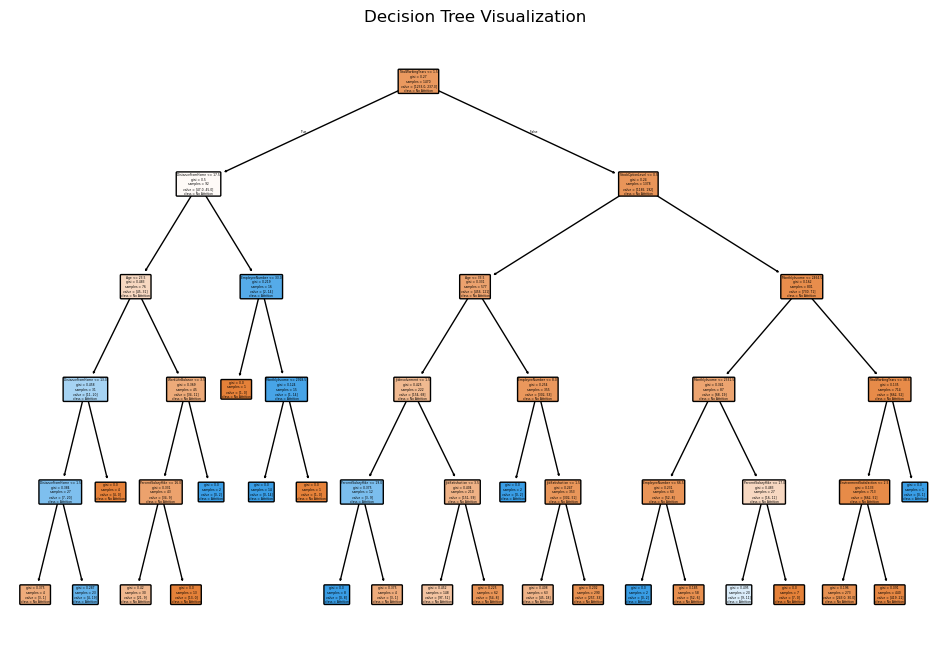

In [76]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Create and fit the decision tree
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf_dt.fit(f, t)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the plot
tree.plot_tree(clf_dt, 
                feature_names=important_features,  # Adjust to your feature names
                class_names=['No Attrition', 'Attrition'],  # Adjust to your class names
                filled=True,
                rounded=True)

# Show the plot
plt.title("Decision Tree Visualization")
plt.show()


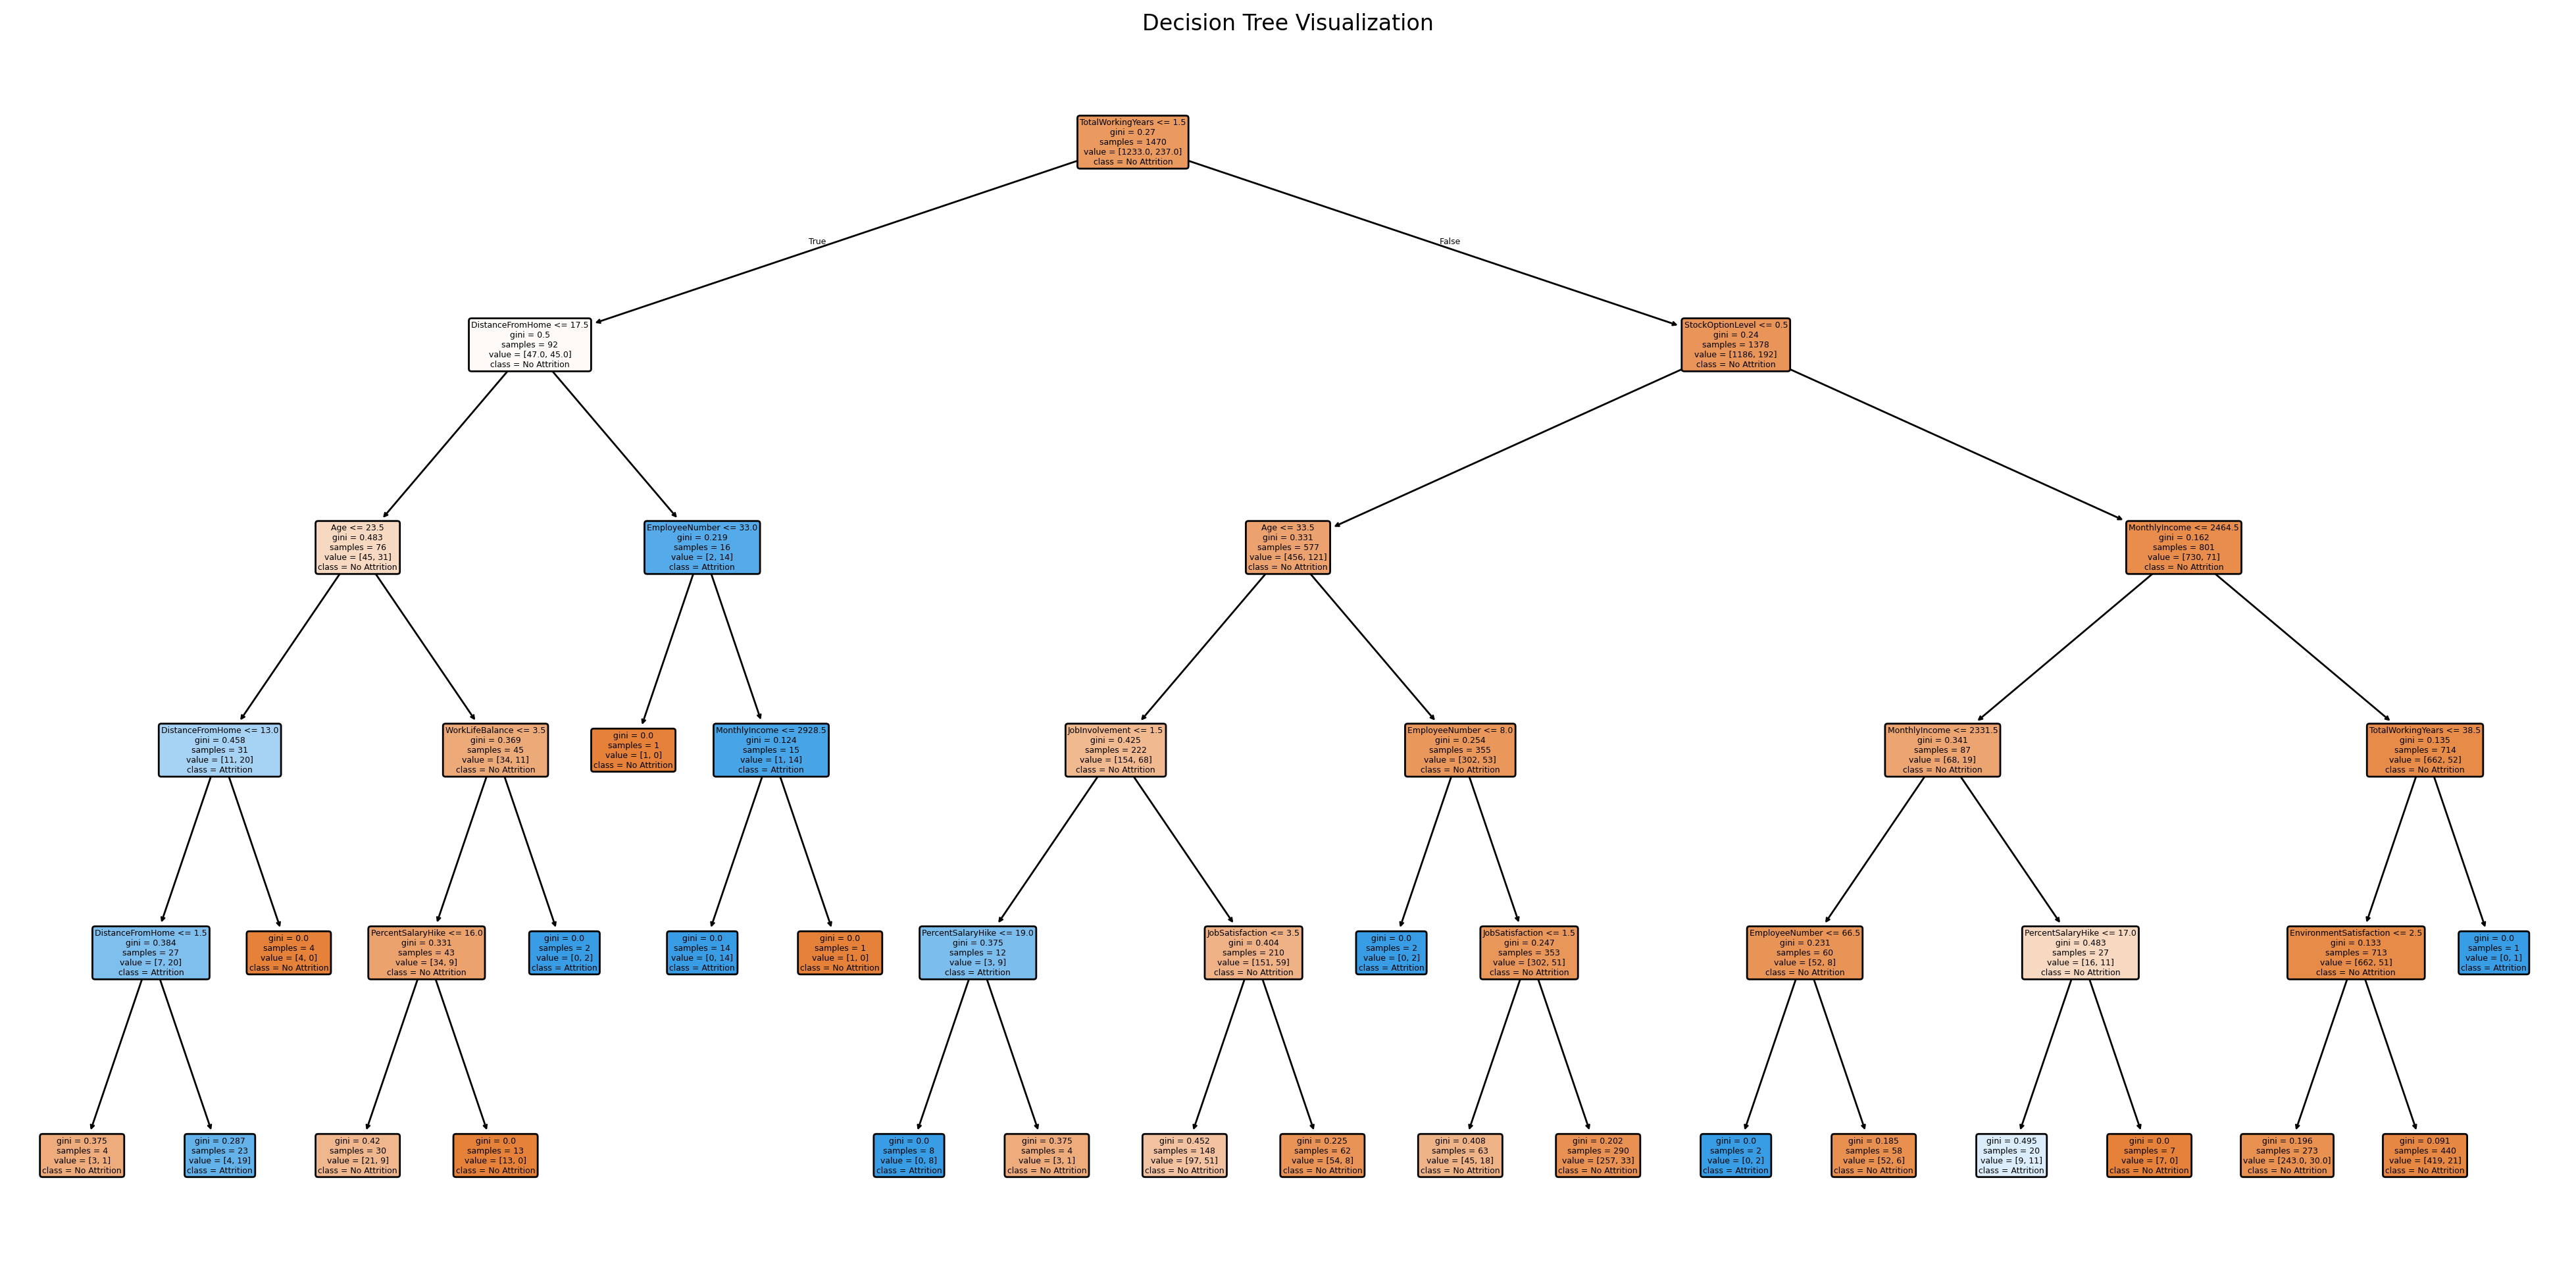

In [108]:
# Plot the decision tree
plt.figure(figsize=(25, 12), dpi=200)  # Set the size of the plot
tree.plot_tree(clf_dt, feature_names=important_features, class_names=['No Attrition', 'Attrition'], filled=True, rounded=True)

# Show the plot
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png", dpi=300, bbox_inches="tight") # save with high resolution
plt.show()

In [78]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

tree_rules = export_text(clf_dt, feature_names=important_features)
print(tree_rules)

|--- TotalWorkingYears <= 1.50
|   |--- DistanceFromHome <= 17.50
|   |   |--- Age <= 23.50
|   |   |   |--- DistanceFromHome <= 13.00
|   |   |   |   |--- DistanceFromHome <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DistanceFromHome >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- DistanceFromHome >  13.00
|   |   |   |   |--- class: 0
|   |   |--- Age >  23.50
|   |   |   |--- WorkLifeBalance <= 3.50
|   |   |   |   |--- PercentSalaryHike <= 16.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PercentSalaryHike >  16.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- WorkLifeBalance >  3.50
|   |   |   |   |--- class: 1
|   |--- DistanceFromHome >  17.50
|   |   |--- EmployeeNumber <= 33.00
|   |   |   |--- class: 0
|   |   |--- EmployeeNumber >  33.00
|   |   |   |--- MonthlyIncome <= 2928.50
|   |   |   |   |--- class: 1
|   |   |   |--- MonthlyIncome >  2928.50
|   |   |   |   |--- class: 0
|--- TotalWorkingYears >  1.50
|   |--- StockOption

# Data-Driven Decision Making

1. Focus on employees with low monthly income:
- Insight: Employees with a monthly income of $2,802 or less are at higher risk of attrition, especially if they meet other conditions (e.g., having worked with their current manager for less than 6 months).

Action:
- Increase compensation for employees who fall in this group, especially those with lower hourly rates.
- Provide bonuses or incentives for employees in this income bracket to improve job satisfaction.

2. Support employees with low tenure with their current manager:
- Insight: Employees who have worked with their current manager for 6 months or less are more likely to leave, particularly if their hourly rate is below $58.50.

Action:
- Implement mentorship programs or regular feedback sessions to help employees build stronger relationships with new managers.
- Provide training for managers on leadership and team-building to foster better relationships with new team members.

3. Focus on employees with low stock option levels:
- Insight: Employees with a stock option level of 0.5 or less are generally safe from attrition as long as their tenure at the company is greater than 2.5 years.

Action:
- For new employees with low stock option levels, offer other forms of long-term incentives (such as career development opportunities or skill-building programs) to encourage retention.
- Consider enhancing stock option offerings for mid-tenure employees to incentivize loyalty.

4. Track tenure with the company:
- Insight: Employees with more than 38 years at the company may be at risk of leaving, likely due to retirement or other reasons.

Action:
- Plan succession programs for employees nearing retirement age or those who have been with the company for long periods.
- Conduct exit interviews to understand the reasons behind long-tenured employees' decisions to leave and address any potential concerns that could impact the retention of younger employees.

5. No immediate action for employees with high tenure and stock option levels:
- Insight: Employees with high stock option levels or long tenure at the company (except those over 38 years) seem to be at low risk of attrition.

- Action: Continue supporting these employees with professional development opportunities and leadership roles to maintain engagement.